In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
churn = pd.read_csv("churn_dataset.csv")

In [3]:
churn.shape

(7043, 21)

In [4]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# converting totalcharges datatype
churn["TotalCharges"] =  np.where(((churn.TotalCharges == '  ')|(churn.TotalCharges == ' ')), 0, churn.TotalCharges)
churn["TotalCharges"] = churn["TotalCharges"].astype(float)

In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:>

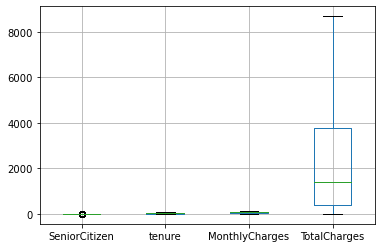

In [20]:
churn.boxplot()

## - Identify the input and output/target variables. 


In [21]:
#input_variables = churn.iloc[::,:20]
input_variables = churn.drop(columns = ["Churn"])

In [22]:
input_variables

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [23]:
#output_variable = churn.iloc[:,20:]
output_variable = churn["Churn"]

## Identify the type of ML Task

#### The target variable - Churn - is a categorical feature. So we choose classification task for this ML model.

##  Identify the Evaluation Metric

#### For classification task Accuracy evaluation metric will be used.

# Data preprocessing

In [24]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
X = input_variables

In [26]:
y = output_variable

In [27]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [28]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Encoding

In [29]:
encoding_data = churn[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]]

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [33]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [9]:
gender_encode = {'Female':1,'Male':2}
MultipleLines_encode = {"No":0,"Yes":1,'No phone service':3}
InternetService_encode = {'DSL':1,"Fiber optic":2,"No":0}
Contract_encode = {'Month-to-month':1,'One year':2,'Two year':3}
PaymentMethod_encode = {'Electronic check':1,'Mailed check':2,'Bank transfer (automatic)':3,'Credit card (automatic)':4}
OnlineSecurity_encode = {"No":0,"Yes":1,"No internet service":3}
churn['gender'] = churn.gender.map(gender_encode)
churn["MultipleLines"] = churn.MultipleLines.map(MultipleLines_encode)
churn['InternetService'] = churn.InternetService.map(InternetService_encode)
churn['Contract'] = churn.Contract.map(Contract_encode)
churn['PaymentMethod'] = churn.PaymentMethod.map(PaymentMethod_encode)
churn["OnlineSecurity"] = churn.OnlineSecurity.map(OnlineSecurity_encode)

In [10]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,No,1,No,3,1,0,...,No,No,No,No,1,Yes,1,29.85,29.85,No
1,5575-GNVDE,2,0,No,No,34,Yes,0,1,1,...,Yes,No,No,No,2,No,2,56.95,1889.50,No
2,3668-QPYBK,2,0,No,No,2,Yes,0,1,1,...,No,No,No,No,1,Yes,2,53.85,108.15,Yes
3,7795-CFOCW,2,0,No,No,45,No,3,1,1,...,Yes,Yes,No,No,2,No,3,42.30,1840.75,No
4,9237-HQITU,1,0,No,No,2,Yes,0,2,0,...,No,No,No,No,1,Yes,1,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2,0,Yes,Yes,24,Yes,1,1,1,...,Yes,Yes,Yes,Yes,2,Yes,2,84.80,1990.50,No
7039,2234-XADUH,1,0,Yes,Yes,72,Yes,1,2,0,...,Yes,No,Yes,Yes,2,Yes,4,103.20,7362.90,No
7040,4801-JZAZL,1,0,Yes,Yes,11,No,3,1,1,...,No,No,No,No,1,Yes,1,29.60,346.45,No
7041,8361-LTMKD,2,1,Yes,No,4,Yes,1,2,0,...,No,No,No,No,1,Yes,2,74.40,306.60,Yes


In [11]:
 churn.replace({"No":0,"Yes":1}, inplace=True)


In [12]:
churn.replace({"No internet service":3}, inplace=True)

In [13]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,3,1,0,...,0,0,0,0,1,1,1,29.85,29.85,0
1,5575-GNVDE,2,0,0,0,34,1,0,1,1,...,1,0,0,0,2,0,2,56.95,1889.50,0
2,3668-QPYBK,2,0,0,0,2,1,0,1,1,...,0,0,0,0,1,1,2,53.85,108.15,1
3,7795-CFOCW,2,0,0,0,45,0,3,1,1,...,1,1,0,0,2,0,3,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,1,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2,0,1,1,24,1,1,1,1,...,1,1,1,1,2,1,2,84.80,1990.50,0
7039,2234-XADUH,1,0,1,1,72,1,1,2,0,...,1,0,1,1,2,1,4,103.20,7362.90,0
7040,4801-JZAZL,1,0,1,1,11,0,3,1,1,...,0,0,0,0,1,1,1,29.60,346.45,0
7041,8361-LTMKD,2,1,1,0,4,1,1,2,0,...,0,0,0,0,1,1,2,74.40,306.60,1


In [15]:
churn.drop('customerID', axis=1, inplace=True)


In [16]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,3,1,0,1,0,0,0,0,1,1,1,29.85,29.85,0
1,2,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,2,56.95,1889.50,0
2,2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,53.85,108.15,1
3,2,0,0,0,45,0,3,1,1,0,1,1,0,0,2,0,3,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,1,70.70,151.65,1


In [18]:
churn["OnlineSecurity"].unique()

array([0, 1, 3], dtype=int64)

In [19]:
churn.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [20]:
X = churn.drop(columns = ["Churn"])

In [21]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,3,1,0,1,0,0,0,0,1,1,1,29.85,29.85
1,2,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,2,56.95,1889.50
2,2,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,53.85,108.15
3,2,0,0,0,45,0,3,1,1,0,1,1,0,0,2,0,3,42.30,1840.75
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,1,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,0,1,1,24,1,1,1,1,0,1,1,1,1,2,1,2,84.80,1990.50
7039,1,0,1,1,72,1,1,2,0,1,1,0,1,1,2,1,4,103.20,7362.90
7040,1,0,1,1,11,0,3,1,1,0,0,0,0,0,1,1,1,29.60,346.45
7041,2,1,1,0,4,1,1,2,0,0,0,0,0,0,1,1,2,74.40,306.60


In [22]:
y = churn["Churn"]

In [23]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

## Split the dataset into Training and Testing (recommended 75:25 split).


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2000)

In [25]:
y_train.value_counts()

0    3876
1    1406
Name: Churn, dtype: int64

## Scaling 

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
sc = MinMaxScaler()

In [28]:
#fit caculate the range 
#transform -- transform the data 
X_train = sc.fit_transform(X_train)

In [29]:
#transform -- transform the data according to train data ranges
X_test = sc.transform(X_test)

# Building  the models

## LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lor_model = LogisticRegression()

In [32]:
lor_model.fit(X_train,y_train)

LogisticRegression()

#### Prediction

In [33]:
y_pred = lor_model.predict(X_test)

In [34]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluate the classification model
### Accuracy Score

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
lor_test_accuracy = accuracy_score(y_test, y_pred) * 100
print("Test Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")

Test Accuracy Score: 79.67064168086314 %


In [37]:
y_pred_train = lor_model.predict(X_train)

In [38]:
print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train) * 100,"%")

Train Accuracy Score: 80.74592957213177 %


#### Summary

#### train accuracy and test accuracy is almost same, so it is fitting better

## KNN

### Without hyper parameter tuning

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_model = KNeighborsClassifier()

In [41]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

#### Prediction

In [42]:
y_pred = knn_model.predict(X_test)

In [43]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Accuracy

In [44]:
print("Test Accuracy Score using knn:", accuracy_score(y_test, y_pred) * 100,"%")

Test Accuracy Score using knn: 75.86598523566155 %


In [45]:
y_pred_train = knn_model.predict(X_train)

In [46]:
print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train) * 100,"%")

Train Accuracy Score: 83.71828852707308 %


#### summary

#### train accuracy is little high and test accuracy is low, so it is slightly overfitting

### with hyper parameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
model = KNeighborsClassifier(n_jobs=-1)

In [49]:
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'n_jobs':[-1]}

In [50]:
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)

In [51]:
model1.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [52]:
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'uniform'}


In [53]:
prediction=model1.predict(X_test)

In [54]:
from sklearn import metrics

In [55]:
knn_test_accuracy = accuracy_score(prediction, y_test) * 100
print("Accuracy:",metrics.accuracy_score(prediction,y_test)*100)

Accuracy: 76.94491766042022


# SVC

### without hyper parameter tuning

In [56]:
from sklearn.svm import SVC

In [57]:
svm_model = SVC(kernel = 'rbf', C = 500, gamma = 10)

In [58]:
svm_model.fit(X_train,y_train)

SVC(C=500, gamma=10)

#### Prediction

In [59]:
y_pred = svm_model.predict(X_test)

In [60]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Accuracy score

In [61]:
print("Test Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")

Test Accuracy Score: 76.0931289040318 %


In [62]:
y_pred_train = svm_model.predict(X_train)

In [63]:
print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train) * 100,"%")

Train Accuracy Score: 98.01211662249149 %


#### summary

#### train accuracy is high and test accuracy is low, so it is overfitting

### with hyperparameter tuning

In [64]:
from sklearn import svm

In [65]:
model=svm.SVC()

In [66]:
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf',"ploy","sigmoid"]}

In [67]:
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

In [68]:
#The best hyper parameters set
model1.fit(X_train,y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [6, 7, 8, 9, 10, 11, 12],
                         'kernel': ['linear', 'rbf', 'ploy', 'sigmoid']})

In [69]:
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'C': 6, 'kernel': 'rbf'}


In [70]:
prediction=model1.predict(X_test)

In [71]:
svc_test_accuracy = accuracy_score(prediction, y_test) * 100
print("Accuracy:",metrics.accuracy_score(prediction,y_test)*100)

Accuracy: 78.76206700738216


# Deciscion Trees

### Without hyper parameter tuning

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt_model = DecisionTreeClassifier(criterion = "entropy" )

In [74]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

#### Prediction

In [75]:
y_pred = dt_model.predict(X_test)

In [76]:
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

#### Accuracy score

In [77]:
print("Test Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")

Test Accuracy Score: 73.480976717774 %


In [78]:
y_pred_train = dt_model.predict(X_train)

In [79]:
print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train) * 100,"%")

Train Accuracy Score: 99.81067777357062 %


#### summary

#### train accuracy is high and test accuracy is low, so it is overfitting

### with hyper parameter tuning

In [80]:
model= DecisionTreeClassifier(random_state=1234)

In [81]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

In [82]:
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

In [83]:
model1.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15],
                         'random_state': [123]})

In [84]:
print("Best Hyper Parameters:",model1.best_params_)

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 11, 'min_samples_split': 2, 'random_state': 123}


In [85]:
prediction=model1.predict(X_test)

In [86]:
dt_test_accuracy = accuracy_score(prediction, y_test) * 100
print("Test Accuracy:",metrics.accuracy_score(prediction,y_test)*100)

Test Accuracy: 76.43384440658717


In [ ]:
y_prediction = model1.predict(X_train)

# Random Forest

### without hyper parameter tuning

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 10)

In [89]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=10)

#### Prediction

In [90]:
y_pred = rf_model.predict(X_test)

In [91]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

#### Accuracy

In [92]:
print("Test Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")

Test Accuracy Score: 79.04599659284497 %


In [93]:
y_pred_train = rf_model.predict(X_train)

In [94]:
print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train) * 100,"%")

Train Accuracy Score: 97.95531995456267 %


#### summary

#### train accuracy is high and test accuracy is low, so it is overfitting

### with hyper parameter tuning

In [95]:
model=RandomForestClassifier()

In [96]:
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

In [97]:
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

In [98]:
model1.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [10, 15, 20, 25, 30], 'n_jobs': [-1],
                         'random_state': [123]})

In [99]:
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}


In [100]:
prediction=model1.predict(X_test)

In [101]:
rf_test_accuracy = accuracy_score(prediction, y_test) * 100
print("Test Accuracy:",metrics.accuracy_score(prediction,y_test)*100)

Test Accuracy: 80.01135718341851


In [102]:
y_prediction = model1.predict(X_train)

In [103]:
print("Train Accuracy:",metrics.accuracy_score(y_train,y_prediction)*100)

Train Accuracy: 89.85232866338508


# Boosting Techniques

## XGBoost

In [287]:
pip install xgboost

In [288]:
from xgboost import XGBClassifier

In [289]:
xgb_model = XGBClassifier(reg_alpha = 0.1)

In [290]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Prediction

In [291]:
y_pred = xgb_model.predict(X_test)

In [292]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

#### Accuracy

In [293]:
print("Test Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")

Test Accuracy Score: 78.36456558773425 %


In [294]:
y_pred_train = xgb_model.predict(X_train)

In [295]:
print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train) * 100,"%")

Train Accuracy Score: 93.79023097311624 %


#### Summary

#### train accuracy is high and test accuracy is low so it is overfitting

## Adaboost

In [104]:
from sklearn.ensemble import AdaBoostClassifier

In [105]:
ada_model = AdaBoostClassifier( n_estimators = 10)

In [106]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10)

#### Prediction

In [107]:
y_pred = ada_model.predict(X_test)

In [108]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

#### Accuracy

In [109]:
test_accuracy_ababoost = print("Test Accuracy Score:", accuracy_score(y_test, y_pred) * 100,"%")

Test Accuracy Score: 78.25099375354912 %


In [110]:
y_pred_train = ada_model.predict(X_train)

In [111]:
print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train) * 100,"%")

Train Accuracy Score: 78.90950397576675 %


#### summary

#### Adaboost fitting better

### with hyper parameter tuning

In [114]:
model = AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=model,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)#,cv=crossvalidation)

In [115]:
search.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [116]:
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}


In [117]:
prediction = search.predict(X_test)

In [118]:
dt_test_accuracy = accuracy_score(prediction, y_test) * 100
print("Test Accuracy:",metrics.accuracy_score(prediction,y_test)*100)

Test Accuracy: 79.78421351504826


# Visualization of accuracy score results

In [119]:
data = {'logestic regression': 79.6, 'knn': 76.9, "svc": 78.7,"random forest": 80.0, "decition tree": 76.4, "ada boost": 79.7}

In [121]:
models = list(data.keys())

In [122]:
Accuracy_score = list(data.values())

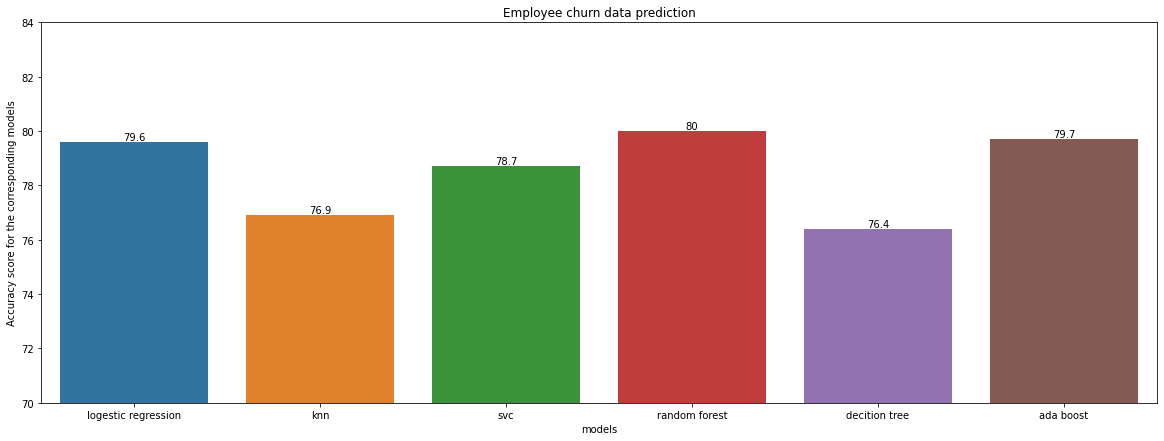

In [135]:
fig = plt.figure(figsize = (20, 7))
ax = sns.barplot(models, Accuracy_score) #color ='green')
plt.ylim(70, 84)
ax.bar_label(ax.containers[0])
plt.xlabel("models")
plt.ylabel("Accuracy score for the corresponding models")
plt.title("Employee churn data prediction")
plt.show()